# GridSearchCV Demonstration

In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, log_loss
from sklearn.metrics import jaccard_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = load_iris()

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
X = iris.data   # features (sepal length, sepal width, petal length, petal width)
Y = iris.target # 3 species of iris (setosa, versicolor, virginica)

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
param_grid = {'C' : [0.1, 1, 10, 100],            # regularization
              'gamma' : [1,0.1,0.01,0.001],       # kernel coefficient
              'kernel' : ['linear','rbf','poly']} # type of kernel

In [12]:
svc = SVC()

In [13]:
grid_search = GridSearchCV(estimator = svc,           # model name
                           param_grid = param_grid,   # grid of parameters
                           scoring = 'accuracy',      # model's performance metric
                           cv = 5,                    # 5-fold cross-validation
                           n_jobs = -1,               # use all available processors
                           verbose = 2)               # show detailed ouput during searching

In [14]:
grid_search.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [15]:
print("Best parameters found:", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)

Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best estimator:  SVC(C=0.1, gamma=0.1, kernel='poly')


In [16]:
ypred = grid_search.best_estimator_.predict(Xtest)

In [17]:
print(classification_report(Ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Test with Logistic Regression

In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [20]:
df = df[['tenure', 'age', 'address', 'income',
        'ed', 'employ', 'equip',   'callcard', 
        'wireless','churn']]

In [21]:
X = df[['tenure', 'age', 'address', 'income',
        'ed', 'employ', 'equip',   'callcard', 
        'wireless',]].to_numpy()
X[:3]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.]])

In [22]:
X = preprocessing.StandardScaler().fit_transform(X)
X[:3]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148]])

In [23]:
Y = df['churn'].to_numpy()
Y[:3]

array([1., 1., 0.])

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=41)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((160, 9), (40, 9), (160,), (40,))

In [25]:
lr = LogisticRegression()

In [26]:
hyparameters = {'C' : [0.01, 0.1, 1],
                'solver' : ['lbfgs','liblinear','newton-cg','sag','saga']}

grid_search = GridSearchCV(estimator = lr,              # model name
                           param_grid = hyparameters,   # grid of parameters
                           scoring = 'accuracy',        # model's performance metric
                           cv = 5,                      # 5-fold cross-validation
                           n_jobs = -1,                 # use all available processors
                           verbose = 2)                 # show detailed ouput during searching

In [27]:
grid_search.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.0s
[CV] END ...........................C=0.01, solv

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=2)

In [28]:
print("Best parameters found:", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)

Best parameters found: {'C': 0.1, 'solver': 'lbfgs'}
Best estimator:  LogisticRegression(C=0.1)


In [29]:
ypred = grid_search.best_estimator_.predict(Xtest)

**Classification Report**

In [30]:
print(classification_report(Ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        28
         1.0       0.75      0.50      0.60        12

    accuracy                           0.80        40
   macro avg       0.78      0.71      0.73        40
weighted avg       0.79      0.80      0.79        40



In [31]:
ypred_proba = grid_search.best_estimator_.predict_proba(Xtest)
ypred_proba

array([[0.9611448 , 0.0388552 ],
       [0.73998515, 0.26001485],
       [0.92748419, 0.07251581],
       [0.85248706, 0.14751294],
       [0.61352989, 0.38647011],
       [0.94120862, 0.05879138],
       [0.49610827, 0.50389173],
       [0.4089698 , 0.5910302 ],
       [0.68357948, 0.31642052],
       [0.44605923, 0.55394077],
       [0.85010967, 0.14989033],
       [0.63572141, 0.36427859],
       [0.64907342, 0.35092658],
       [0.54523422, 0.45476578],
       [0.84144982, 0.15855018],
       [0.99431528, 0.00568472],
       [0.53777129, 0.46222871],
       [0.97277477, 0.02722523],
       [0.86636209, 0.13363791],
       [0.78205124, 0.21794876],
       [0.96896309, 0.03103691],
       [0.84414488, 0.15585512],
       [0.90115787, 0.09884213],
       [0.93340069, 0.06659931],
       [0.37180332, 0.62819668],
       [0.37361169, 0.62638831],
       [0.87777917, 0.12222083],
       [0.87232736, 0.12767264],
       [0.78758877, 0.21241123],
       [0.87784379, 0.12215621],
       [0.

**Logloss value**

In [35]:
log_loss(Ytest, ypred_proba)

0.5194785029392006

**Jaccard Score**

In [39]:
jaccard_score(Ytest, ypred, pos_label=0)

0.7647058823529411

**Confusion Matrix**

In [79]:
cm = confusion_matrix(Ytest, ypred, labels=[1,0])
cm

array([[ 6,  6],
       [ 2, 26]], dtype=int64)

In [72]:
cm[0,1]

6

In [63]:
cm.shape

(2, 2)

In [66]:
list(range(2)), list(range(2))

([0, 1], [0, 1])

In [61]:
list(itertools.product(range(2),range(2)))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [67]:
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    print(i, j)
    

0 0
0 1
1 0
1 1


[0 1]


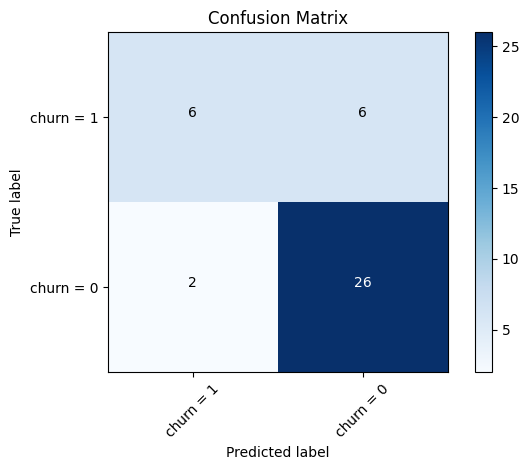

In [82]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

# below code related with "confusion_matrix(Ytest, ypred, labels=[1,0])"
classes = ['churn = 1', 'churn = 0']

plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
ticks = np.arange(len(classes))
print(ticks)
plt.xticks(ticks=ticks, labels=classes, rotation=45)
plt.yticks(ticks=ticks, labels=classes)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(x = j, 
             y = i, 
             s = cm[i, j],
             horizontalalignment = 'center',
             color = 'white' if cm[i,j]>cm.max()/2 else 'black')

plt.colorbar()
plt.tight_layout()
plt.show()